### daily region data

### C√†i ƒë·∫∑t th∆∞ vi·ªán Meteostat ƒë·ªÉ thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt
Meteostat l√† th∆∞ vi·ªán Python ƒë·ªÉ truy c·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt l·ªãch s·ª≠ t·ª´ nhi·ªÅu tr·∫°m quan tr·∫Øc tr√™n th·∫ø gi·ªõi.

In [ ]:
# C√†i ƒë·∫∑t th∆∞ vi·ªán Meteostat
!pip install meteostat

In [ ]:
# Class ƒë·ªÉ thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt
from meteostat import Daily, Point
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings('ignore')

class WeatherDataCollector:
    def __init__(self):
        """
        Kh·ªüi t·∫°o WeatherDataCollector
        """
        # ƒê·ªãnh nghƒ©a c√°c ƒëi·ªÉm quan tr·∫Øc th·ªùi ti·∫øt cho c√°c v√πng ƒëi·ªán ch√≠nh c·ªßa M·ªπ
        self.region_weather_points = {
            'CAISO': Point(34.0522, -118.2437),  # Los Angeles, CA
            'PJM': Point(39.2904, -76.6122),     # Baltimore, MD
            'ERCOT': Point(30.2672, -97.7431),   # Austin, TX
            'MISO': Point(41.8781, -87.6298),    # Chicago, IL
            'SPP': Point(39.7391, -94.6857),     # Kansas City, MO
            'ISONE': Point(42.3601, -71.0589),   # Boston, MA
            'NYISO': Point(40.7128, -74.0060),   # New York, NY
            'SWPP': Point(35.4676, -97.5164),    # Oklahoma City, OK
            'BPAT': Point(45.5152, -122.6784),   # Portland, OR
            'CPLE': Point(35.2271, -80.8431),    # Charlotte, NC
            'DUK': Point(35.9940, -78.8986),     # Raleigh, NC
            'FPC': Point(27.9506, -82.4572),     # Tampa, FL
            'FPL': Point(25.7617, -80.1918),     # Miami, FL
            'PACE': Point(30.4518, -84.2807),    # Tallahassee, FL
            'PSCO': Point(39.7392, -104.9903),   # Denver, CO
            'SC': Point(34.0000, -81.0348),      # Columbia, SC
            'SCEG': Point(34.0000, -81.0348),    # Columbia, SC
            'SEC': Point(33.4484, -86.8017),     # Birmingham, AL
            'SOCO': Point(33.7490, -84.3880),    # Atlanta, GA
            'SRP': Point(33.4484, -112.0740),    # Phoenix, AZ
            'TAL': Point(32.8207, -83.6324),     # Macon, GA
            'TEC': Point(25.7617, -80.1918),    # Miami, FL
            'TVA': Point(35.2131, -101.8313),    # Amarillo, TX
            'WACM': Point(47.0379, -122.9015),   # Olympia, WA
            'WALC': Point(33.4484, -112.0740),   # Phoenix, AZ
            'WAUW': Point(47.6062, -122.3321),   # Seattle, WA
        }

        # C√°c tham s·ªë th·ªùi ti·∫øt quan tr·ªçng ·∫£nh h∆∞·ªüng ƒë·∫øn nhu c·∫ßu ƒëi·ªán
        self.weather_features = [
            'tavg',    # Nhi·ªát ƒë·ªô trung b√¨nh (¬∞C)
            'tmin',    # Nhi·ªát ƒë·ªô t·ªëi thi·ªÉu (¬∞C)
            'tmax',    # Nhi·ªát ƒë·ªô t·ªëi ƒëa (¬∞C)
            'prcp',    # L∆∞·ª£ng m∆∞a (mm)
            'wspd',    # T·ªëc ƒë·ªô gi√≥ (km/h)
            'pres',    # √Åp su·∫•t kh√≠ quy·ªÉn (hPa)
            'tsun',    # Th·ªùi gian n·∫Øng (ph√∫t)
        ]

    def get_weather_data(self, region: str, start_date: str, end_date: str) -> pd.DataFrame:
        """
        Thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt cho m·ªôt v√πng c·ª• th·ªÉ

        Args:
            region: T√™n v√πng (v√≠ d·ª•: 'CAISO', 'PJM', ...)
            start_date: Ng√†y b·∫Øt ƒë·∫ßu (YYYY-MM-DD)
            end_date: Ng√†y k·∫øt th√∫c (YYYY-MM-DD)

        Returns:
            DataFrame ch·ª©a d·ªØ li·ªáu th·ªùi ti·∫øt
        """
        if region not in self.region_weather_points:
            print(f"‚ö†Ô∏è V√πng '{region}' kh√¥ng c√≥ trong danh s√°ch. S·ª≠ d·ª•ng ƒëi·ªÉm m·∫∑c ƒë·ªãnh (New York).")
            weather_point = self.region_weather_points['NYISO']
        else:
            weather_point = self.region_weather_points[region]

        print(f"üå§Ô∏è Thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt cho v√πng: {region}")
        # Removed the print statement that caused the AttributeError
        # print(f"üìç T·ªça ƒë·ªô: {weather_point.lat}, {weather_point.lon}")
        print(f"üìÖ Th·ªùi gian: {start_date} ƒë·∫øn {end_date}")

        try:
            # Chuy·ªÉn ƒë·ªïi ƒë·ªãnh d·∫°ng ng√†y
            start = datetime.strptime(start_date, '%Y-%m-%d')
            end = datetime.strptime(end_date, '%Y-%m-%d')

            # Thu th·∫≠p d·ªØ li·ªáu t·ª´ Meteostat
            data = Daily(weather_point, start, end)
            weather_df = data.fetch()

            if weather_df.empty:
                print(f"‚ùå Kh√¥ng c√≥ d·ªØ li·ªáu th·ªùi ti·∫øt cho v√πng {region}")
                return pd.DataFrame()

            # Reset index ƒë·ªÉ c√≥ c·ªôt date
            weather_df = weather_df.reset_index()
            weather_df['region'] = region
            weather_df['date'] = weather_df['time']

            # Ch·ªçn c√°c c·ªôt c·∫ßn thi·∫øt
            available_cols = ['time', 'region'] + [col for col in self.weather_features if col in weather_df.columns]
            weather_df = weather_df[available_cols]

            print(f"‚úÖ Thu th·∫≠p th√†nh c√¥ng {len(weather_df)} ng√†y d·ªØ li·ªáu th·ªùi ti·∫øt")
            print(f"üìä C√°c ch·ªâ s·ªë th·ªùi ti·∫øt c√≥ s·∫µn: {[col for col in self.weather_features if col in weather_df.columns]}")

            return weather_df

        except Exception as e:
            print(f"‚ùå L·ªói khi thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt: {e}")
            return pd.DataFrame()

    def get_all_regions_weather(self, regions: list, start_date: str, end_date: str) -> pd.DataFrame:
        """
        Thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt cho t·∫•t c·∫£ c√°c v√πng

        Args:
            regions: Danh s√°ch c√°c v√πng
            start_date: Ng√†y b·∫Øt ƒë·∫ßu
            end_date: Ng√†y k·∫øt th√∫c

        Returns:
            DataFrame ch·ª©a d·ªØ li·ªáu th·ªùi ti·∫øt cho t·∫•t c·∫£ c√°c v√πng
        """
        all_weather_data = []

        print(f"üåç Thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt cho {len(regions)} v√πng...")

        for i, region in enumerate(regions, 1):
            print(f"\nüìç V√πng {i}/{len(regions)}: {region}")
            weather_data = self.get_weather_data(region, start_date, end_date)

            if not weather_data.empty:
                all_weather_data.append(weather_data)

            # Ngh·ªâ ng·∫Øn ƒë·ªÉ kh√¥ng qu√° t·∫£i API
            import time
            time.sleep(0.5)

        if all_weather_data:
            combined_weather = pd.concat(all_weather_data, ignore_index=True)
            print(f"\nüéâ Ho√†n th√†nh thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt!")
            print(f"üìä T·ªïng s·ªë b·∫£n ghi: {len(combined_weather)}")
            print(f"üåé S·ªë v√πng: {combined_weather['region'].nunique()}")
            return combined_weather
        else:
            print("‚ùå Kh√¥ng thu th·∫≠p ƒë∆∞·ª£c d·ªØ li·ªáu th·ªùi ti·∫øt n√†o!")
            return pd.DataFrame()

    def add_weather_features(self, weather_df: pd.DataFrame) -> pd.DataFrame:
        """
        Th√™m c√°c ƒë·∫∑c tr∆∞ng th·ªùi ti·∫øt ph√°t sinh

        Args:
            weather_df: DataFrame d·ªØ li·ªáu th·ªùi ti·∫øt g·ªëc

        Returns:
            DataFrame v·ªõi c√°c ƒë·∫∑c tr∆∞ng b·ªï sung
        """
        if weather_df.empty:
            return weather_df

        df = weather_df.copy()

        print("üîß T·∫°o c√°c ƒë·∫∑c tr∆∞ng th·ªùi ti·∫øt b·ªï sung...")

        # Ch·ªâ s·ªë nhi·ªát ƒë·ªô
        if 'tmax' in df.columns and 'tmin' in df.columns:
            df['temp_range'] = df['tmax'] - df['tmin']  # Bi√™n ƒë·ªô nhi·ªát ƒë·ªô

        if 'tavg' in df.columns:
            # Ch·ªâ s·ªë Cooling Degree Days (CDD) - cho ƒëi·ªÅu h√≤a
            df['cdd'] = np.maximum(df['tavg'] - 18, 0)  # 18¬∞C l√† ng∆∞·ª°ng
            # Ch·ªâ s·ªë Heating Degree Days (HDD) - cho s∆∞·ªüi ·∫•m
            df['hdd'] = np.maximum(18 - df['tavg'], 0)

            # Nhi·ªát ƒë·ªô c·ª±c ƒëoan (Handle potential NaNs by filling with 0 before converting to int)
            df['temp_extreme_cold'] = (df['tavg'].fillna(0) < 0).astype(int)
            df['temp_extreme_hot'] = (df['tavg'].fillna(0) > 35).astype(int)

        # Ch·ªâ s·ªë gi√≥ (Handle potential NaNs)
        if 'wspd' in df.columns:
            df['wind_high'] = (df['wspd'].fillna(0) > 20).astype(int)  # Gi√≥ m·∫°nh (>20 km/h)

        # Ch·ªâ s·ªë m∆∞a (Handle potential NaNs)
        if 'prcp' in df.columns:
            df['rain_day'] = (df['prcp'].fillna(0) > 0).astype(int)
            df['heavy_rain'] = (df['prcp'].fillna(0) > 10).astype(int)  # M∆∞a l·ªõn (>10mm)

        # Ch·ªâ s·ªë √°p su·∫•t (Handle potential NaNs)
        if 'pres' in df.columns:
            df['pressure_low'] = (df['pres'].fillna(1013) < 1000).astype(int)  # √Åp su·∫•t th·∫•p (fill with average pressure)
            df['pressure_high'] = (df['pres'].fillna(1013) > 1020).astype(int) # √Åp su·∫•t cao (fill with average pressure)


        # Lag features cho th·ªùi ti·∫øt (·∫£nh h∆∞·ªüng c·ªßa th·ªùi ti·∫øt ng√†y tr∆∞·ªõc)
        if 'region' in df.columns:
            for col in ['tavg', 'tmax', 'tmin', 'prcp', 'wspd']:
                if col in df.columns:
                    # Fill NaNs after shifting to avoid errors in calculations
                    df[f'{col}_lag1'] = df.groupby('region')[col].shift(1)
                    df[f'{col}_lag3'] = df.groupby('region')[col].shift(3)

                    # Rolling averages
                    df[f'{col}_ma7'] = df.groupby('region')[col].transform(
                        lambda x: x.rolling(window=7, min_periods=1).mean()
                    )
        # Fill NaNs created by shift/rolling operations with 0 or a sensible value if needed later
        # For now, leaving NaNs is acceptable for these features as they will be handled by ML models

        print(f"‚úÖ ƒê√£ t·∫°o {len(df.columns) - len(weather_df.columns)} ƒë·∫∑c tr∆∞ng th·ªùi ti·∫øt b·ªï sung")

        return df

# T·∫°o instance c·ªßa collector
weather_collector = WeatherDataCollector()
print("‚úÖ WeatherDataCollector ƒë√£ ƒë∆∞·ª£c kh·ªüi t·∫°o!")

‚úÖ WeatherDataCollector ƒë√£ ƒë∆∞·ª£c kh·ªüi t·∫°o!


In [ ]:
# step1_daily_region_data_loader.py
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

class EIADailyRegionDataLoader:
    def __init__(self, api_key: str):
        self.api_key = api_key
        self.base_url = "https://api.eia.gov/v2"

    def load_daily_region_data(self,
                              start_date: str = "2020-06-01",
                              end_date: str = "2022-06-01",
                              save_to_csv: bool = True,
                              max_records: int = None) -> pd.DataFrame:
        """
        Load daily electricity regional data using your specific URL

        Args:
            start_date: Start date in format "YYYY-MM-DD"
            end_date: End date in format "YYYY-MM-DD"
            save_to_csv: Whether to save data to CSV file
            max_records: Maximum number of records to collect (None = all)
        """

        print(f"üîåüìä Loading DAILY REGIONAL electricity data")
        print(f"üìÖ Period: {start_date} to {end_date}")
        print(f"üë§ Current User: tructd123")
        print(f"üïê Current Time: 2025-06-14 16:53:17 UTC")
        print("-" * 70)

        # Base URL from your example
        base_url = "https://api.eia.gov/v2/electricity/rto/daily-region-data/data/"

        # Parameters based on your URL
        params = {
            'api_key': self.api_key,
            'frequency': 'daily',
            'data[0]': 'value',
            'start': start_date,
            'end': end_date,
            'sort[0][column]': 'period',
            'sort[0][direction]': 'asc',
            'offset': 0,
            'length': 5000
        }

        all_data = []
        offset = 0
        batch_count = 0
        start_time = time.time()

        print(f"üöÄ Starting data collection...")

        while True:
            batch_count += 1
            print(f"üì• Fetching batch {batch_count} (offset: {offset:,})...")

            # Update offset parameter
            params['offset'] = offset

            try:
                response = requests.get(base_url, params=params, timeout=60)
                response.raise_for_status()

                print(f"‚úÖ Response status: {response.status_code}")

                data = response.json()

                # Debug: Show response structure for first batch
                if batch_count == 1:
                    print("\nüîç API Response structure:")
                    if 'response' in data:
                        print(f"  - response keys: {list(data['response'].keys())}")
                        if 'data' in data['response']:
                            print(f"  - data length: {len(data['response']['data'])}")
                            if data['response']['data']:
                                print(f"  - first record keys: {list(data['response']['data'][0].keys())}")
                                print(f"  - sample record:")
                                print(json.dumps(data['response']['data'][0], indent=4))
                    print()

                if 'response' in data and 'data' in data['response']:
                    batch_data = data['response']['data']

                    if not batch_data:  # No more data
                        print("üì≠ No more data available.")
                        break

                    all_data.extend(batch_data)
                    elapsed_time = time.time() - start_time

                    print(f"‚úÖ Loaded {len(batch_data):,} records | Total: {len(all_data):,} | "
                          f"Time: {elapsed_time:.1f}s | Rate: {len(all_data)/elapsed_time:.1f} rec/s")

                    # Check max records limit
                    if max_records and len(all_data) >= max_records:
                        print(f"üõë Reached maximum records limit ({max_records:,}). Stopping.")
                        all_data = all_data[:max_records]
                        break

                    # Check if we got less than the limit (last page)
                    if len(batch_data) < 5000:
                        print("üìÑ Reached last page of data.")
                        break

                    offset += 5000

                    # Rate limiting - be respectful to the API
                    time.sleep(0.3)

                    # Safety limit
                    if batch_count > 1000:  # Reasonable limit for daily data
                        print("‚ö†Ô∏è Reached batch limit (1000). Stopping for safety.")
                        break

                else:
                    print("‚ö†Ô∏è No data in API response")
                    if 'error' in data:
                        print(f"‚ùå API Error: {data['error']}")
                    elif 'errors' in data:
                        print(f"‚ùå API Errors: {data['errors']}")
                    break

            except requests.exceptions.RequestException as e:
                print(f"‚ùå Request error: {e}")
                print("üîÑ Retrying in 5 seconds...")
                time.sleep(5)
                continue
            except json.JSONDecodeError as e:
                print(f"‚ùå JSON decode error: {e}")
                print(f"Response text preview: {response.text[:500]}...")
                break
            except Exception as e:
                print(f"‚ùå Unexpected error: {e}")
                break

        total_time = time.time() - start_time

        if not all_data:
            print("‚ùå No data collected!")
            return pd.DataFrame()

        print(f"\nüéâ Data collection completed!")
        print(f"üìä Total records collected: {len(all_data):,}")
        print(f"‚è±Ô∏è Total time: {total_time:.1f} seconds")
        print(f"üìà Average rate: {len(all_data)/total_time:.1f} records/second")

        # Convert to DataFrame
        df = pd.DataFrame(all_data)

        print(f"üìã Data columns: {df.columns.tolist()}")
        print(f"üìè Data shape: {df.shape}")

        # --- ADDED: Convert 'value' to numeric and handle nulls immediately ---
        if 'value' in df.columns:
            original_nulls = df['value'].isnull().sum()
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            new_nulls = df['value'].isnull().sum()
            print(f"‚úÖ Converted value to numeric. NaN values: {new_nulls:,} (was {original_nulls:,})")

        # Remove null values in critical columns
        initial_rows = len(df)
        df = df.dropna(subset=['value'])
        removed_rows = initial_rows - len(df)
        print(f"‚úÖ Removed {removed_rows:,} rows with null values ({removed_rows/initial_rows*100:.2f}%)")
        # --- END ADDED ---


        # Show sample data
        print(f"\nüìã Sample records:")
        print(df.head())

        # Show unique values for key columns
        if 'respondent' in df.columns:
            respondents = sorted(df['respondent'].unique())
            print(f"\nüåé Available regions/respondents ({len(respondents)}):")
            for i, resp in enumerate(respondents, 1):
                count = len(df[df['respondent'] == resp])
                # Now 'value' is numeric, so .mean() should work
                avg_value = df[df['respondent'] == resp]['value'].mean() if 'value' in df.columns and not df[df['respondent'] == resp].empty else 0
                print(f"  {i:2d}. {resp} ({count:,} records, avg: {avg_value:.2f})")

        if 'type' in df.columns:
            types = sorted(df['type'].unique())
            print(f"\nüìà Available data types: {types}")

        if 'type-name' in df.columns:
            type_names = sorted(df['type-name'].unique())
            print(f"\nüìà Available type names: {type_names}")

        # Data cleaning and preprocessing (remaining steps)
        # We pass the already cleaned/numeric DataFrame here
        df = self.preprocess_daily_region_data(df)

        if save_to_csv:
            # timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            filename = f"daily_region_data_{start_date}_to_{end_date}.csv"

            print(f"\nüíæ Saving data to {filename}...")
            df.to_csv(filename, index=False)

            # Also save a summary file
            summary_filename = f"daily_region_summary.csv"
            if 'respondent' in df.columns:
                # Ensure we use the preprocessed (cleaned) dataframe for summary
                summary = df.groupby('respondent').agg({
                    'value': ['count', 'mean', 'std', 'min', 'max', 'sum']
                }).round(2)
                summary.to_csv(summary_filename)
                print(f"üìä Summary saved to: {summary_filename}")

            print(f"‚úÖ Full data saved to: {filename}")

        return df

    def preprocess_daily_region_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """Clean and preprocess the daily regional electricity data"""

        print(f"\nüîß Preprocessing daily regional data...")

        # Show original columns and data types
        # Note: 'value' column should now be numeric due to processing in load_daily_region_data
        print(f"üìã Columns: {df.columns.tolist()}")
        print(f"üìä Shape: {df.shape}")

        # Convert period to datetime
        if 'period' in df.columns:
            print("üìÖ Converting period to datetime...")
            # Check if already datetime (from load_daily_region_data)
            if not pd.api.types.is_datetime64_any_dtype(df['period']):
                 df['period'] = pd.to_datetime(df['period'])
            print(f"‚úÖ Period range: {df['period'].min()} to {df['period'].max()}")

        # Note: Value conversion and NaN handling are now done in load_daily_region_data

        # Sort data
        sort_columns = ['period']
        if 'respondent' in df.columns:
            sort_columns = ['respondent', 'period']
        if 'type' in df.columns:
            sort_columns = ['respondent', 'type', 'period'] if 'respondent' in df.columns else ['type', 'period']

        print(f"üîÑ Sorting data by: {sort_columns}")
        df = df.sort_values(sort_columns)
        df = df.reset_index(drop=True)
        print("‚úÖ Data sorted and reindexed")

        # Add comprehensive time-based features
        print("üìÖ Adding time-based features...")
        df['year'] = df['period'].dt.year
        df['month'] = df['period'].dt.month
        df['day'] = df['period'].dt.day
        df['day_of_week'] = df['period'].dt.dayofweek
        df['day_of_year'] = df['period'].dt.dayofyear
        df['week_of_year'] = df['period'].dt.isocalendar().week # .isocalendar().week returns a Series, needs .week accessor
        df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
        df['quarter'] = df['period'].dt.quarter

        # Month day for seasonal patterns
        df['month_day'] = df['period'].dt.strftime('%m-%d')

        # Season mapping
        def get_season(month):
            if month in [12, 1, 2]:
                return 'Winter'
            elif month in [3, 4, 5]:
                return 'Spring'
            elif month in [6, 7, 8]:
                return 'Summer'
            else:
                return 'Fall'

        df['season'] = df['month'].apply(get_season)

        # Holiday indicators (basic US holidays)
        df['date'] = df['period'].dt.date
        # Check if year range is valid for holidays
        if not df.empty:
             min_year = df['year'].min()
             max_year = df['year'].max()
             holidays = self.get_us_holidays(min_year, max_year)
             df['is_holiday'] = df['date'].isin(holidays).astype(int)
        else:
             df['is_holiday'] = 0 # Add column even if empty
             holidays = set() # Define holidays even if empty

        # Business day indicator
        df['is_business_day'] = ((df['day_of_week'] < 5) & (df['is_holiday'] == 0)).astype(int)

        print("‚úÖ Added comprehensive time-based features")

        # Add lag features for demand forecasting
        print("üîÑ Computing lag and rolling features...")

        # Only attempt lag/rolling features if there is data and relevant columns exist
        if not df.empty and 'value' in df.columns:
            if 'respondent' in df.columns and 'type' in df.columns:
                print("  - Computing features by region and type...")
                groupby_cols = ['respondent', 'type']

                # Lag features
                df['demand_lag_1d'] = df.groupby(groupby_cols)['value'].shift(1)
                df['demand_lag_7d'] = df.groupby(groupby_cols)['value'].shift(7)
                df['demand_lag_30d'] = df.groupby(groupby_cols)['value'].shift(30)
                df['demand_lag_365d'] = df.groupby(groupby_cols)['value'].shift(365)  # Year-over-year

                # Rolling averages
                print("    - Computing rolling averages...")
                df['demand_ma_7d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=7, min_periods=1).mean()
                )
                df['demand_ma_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).mean()
                )
                df['demand_ma_90d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=90, min_periods=1).mean()
                )

                # Trend features
                df['demand_trend_7d'] = df['value'] - df['demand_lag_7d']
                df['demand_trend_30d'] = df['value'] - df['demand_lag_30d']
                df['demand_growth_rate_7d'] = ((df['value'] - df['demand_lag_7d']) /
                                              (df['demand_lag_7d'] + 1e-6) * 100).fillna(0)
                df['demand_growth_rate_30d'] = ((df['value'] - df['demand_lag_30d']) /
                                               (df['demand_lag_30d'] + 1e-6) * 100).fillna(0)

                # Year-over-year comparison
                df['demand_yoy_change'] = df['value'] - df['demand_lag_365d']
                df['demand_yoy_growth'] = ((df['value'] - df['demand_lag_365d']) /
                                          (df['demand_lag_365d'] + 1e-6) * 100).fillna(0)

                # Rolling statistics
                df['demand_std_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).std()
                )
                df['demand_max_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).max()
                )
                df['demand_min_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).min()
                )

                # Volatility measures
                df['demand_volatility_30d'] = df['demand_std_30d'] / (df['demand_ma_30d'] + 1e-6)

            elif 'respondent' in df.columns:
                print("  - Computing features by region...")
                # Simplified version by respondent only
                df['demand_lag_1d'] = df.groupby('respondent')['value'].shift(1)
                df['demand_lag_7d'] = df.groupby('respondent')['value'].shift(7)
                df['demand_lag_30d'] = df.groupby('respondent')['value'].shift(30)

                df['demand_ma_7d'] = df.groupby('respondent')['value'].transform(
                    lambda x: x.rolling(window=7, min_periods=1).mean()
                )
                df['demand_ma_30d'] = df.groupby('respondent')['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).mean()
                )

                df['demand_trend_7d'] = df['value'] - df['demand_lag_7d']
                df['demand_growth_rate_7d'] = ((df['value'] - df['demand_lag_7d']) /
                                              (df['demand_lag_7d'] + 1e-6) * 100).fillna(0)
            else:
                print("  - Computing features for entire dataset...")
                # Simple features for entire dataset
                df['demand_lag_1d'] = df['value'].shift(1)
                df['demand_lag_7d'] = df['value'].shift(7)
                df['demand_lag_30d'] = df['value'].shift(30)

                df['demand_ma_7d'] = df['value'].rolling(window=7, min_periods=1).mean()
                df['demand_ma_30d'] = df['value'].rolling(window=30, min_periods=1).mean()

                df['demand_trend_7d'] = df['value'] - df['demand_lag_7d']
                df['demand_growth_rate_7d'] = ((df['value'] - df['demand_lag_7d']) /
                                              (df['demand_lag_7d'] + 1e-6) * 100).fillna(0)
        else:
            print("  - Skipping lag and rolling features due to empty data or missing 'value' column.")
            # Add placeholder columns to avoid errors later
            lag_cols = ['demand_lag_1d', 'demand_lag_7d', 'demand_lag_30d', 'demand_lag_365d',
                        'demand_ma_7d', 'demand_ma_30d', 'demand_ma_90d', 'demand_trend_7d',
                        'demand_trend_30d', 'demand_growth_rate_7d', 'demand_growth_rate_30d',
                        'demand_yoy_change', 'demand_yoy_growth', 'demand_std_30d',
                        'demand_max_30d', 'demand_min_30d', 'demand_volatility_30d']
            for col in lag_cols:
                 if col not in df.columns:
                      df[col] = np.nan # or 0, depending on desired behavior for empty data


        print("‚úÖ Added lag and rolling features")

        # Add cyclical encoding for time features
        print("üîÑ Adding cyclical time encodings...")
        # Check if period column is available and datetime
        if not df.empty and 'period' in df.columns and pd.api.types.is_datetime64_any_dtype(df['period']):
            df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
            df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
            df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
            df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
            df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
            df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
            print("‚úÖ Added cyclical encodings")
        else:
             print("  - Skipping cyclical encodings due to empty data or invalid 'period' column.")
             # Add placeholder columns
             cyclic_cols = ['day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos',
                            'day_of_year_sin', 'day_of_year_cos']
             for col in cyclic_cols:
                  if col not in df.columns:
                       df[col] = np.nan


        print(f"\n‚úÖ Preprocessing completed!")
        print(f"üìä Final shape: {df.shape}")
        print(f"üìã Final columns ({len(df.columns)}): {df.columns.tolist()}")

        # Memory usage info
        memory_usage = df.memory_usage(deep=True).sum() / 1024**2  # MB
        print(f"üíæ Memory usage: {memory_usage:.2f} MB")

        return df

    def get_us_holidays(self, start_year: int, end_year: int) -> set:
        """Get basic US holidays for the given year range"""
        holidays = set()

        for year in range(start_year, end_year + 1):
            # Fixed holidays
            holidays.add(datetime(year, 1, 1).date())   # New Year's Day
            holidays.add(datetime(year, 7, 4).date())   # Independence Day
            holidays.add(datetime(year, 11, 11).date()) # Veterans Day
            holidays.add(datetime(year, 12, 25).date()) # Christmas Day

            # Thanksgiving (4th Thursday in November)
            nov_first = datetime(year, 11, 1)
            first_thursday = nov_first + timedelta(days=(3 - nov_first.weekday()) % 7)
            thanksgiving = first_thursday + timedelta(days=21)  # 4th Thursday
            holidays.add(thanksgiving.date())

            # Memorial Day (last Monday in May)
            may_last = datetime(year, 5, 31)
            while may_last.weekday() != 0:  # Find last Monday
                may_last -= timedelta(days=1)
            holidays.add(may_last.date())

            # Labor Day (first Monday in September)
            sep_first = datetime(year, 9, 1)
            first_monday = sep_first + timedelta(days=(7 - sep_first.weekday()) % 7)
            holidays.add(first_monday.date())

        return holidays

    def explore_daily_region_data(self, df: pd.DataFrame):
        """Explore the loaded daily regional dataset"""

        print("\n" + "="*80)
        print("üìä DAILY REGIONAL ELECTRICITY DATA EXPLORATION")
        print("="*80)

        # Check if DataFrame is empty before proceeding
        if df.empty:
            print("üîç Dataset is empty. No exploration to perform.")
            return

        # Basic info
        print(f"üìà Dataset shape: {df.shape}")
        print(f"üìÖ Date range: {df['period'].min()} to {df['period'].max()}")
        print(f"üìÜ Total days of data: {df['period'].nunique():,}")
        print(f"üìç Missing values in 'value': {df['value'].isnull().sum():,}") # Should be 0 or very low now

        # Time span analysis
        total_days = (df['period'].max() - df['period'].min()).days
        data_completeness = df['period'].nunique() / total_days * 100 if total_days > 0 else 0
        print(f"‚è±Ô∏è Time span: {total_days:,} days ({total_days/365:.1f} years)")
        print(f"üìä Data completeness: {data_completeness:.2f}%")

        # Regional analysis
        if 'respondent' in df.columns:
            regions = df['respondent'].unique()
            print(f"\nüåé Regions/Respondents Available ({len(regions)}):")
            # Ensure 'value' is numeric before aggregation
            if pd.api.types.is_numeric_dtype(df['value']):
                regional_stats = df.groupby('respondent').agg({
                    'value': ['count', 'sum', 'mean', 'std', 'min', 'max']
                }).round(2)
                regional_stats.columns = ['Records', 'Total_MWh', 'Mean_MWh', 'Std_MWh', 'Min_MWh', 'Max_MWh']
                regional_stats = regional_stats.sort_values('Total_MWh', ascending=False)
                print(regional_stats)
            else:
                 print("‚ö†Ô∏è Cannot compute regional stats: 'value' column is not numeric.")

        # Type analysis
        if 'type' in df.columns:
            types = df['type'].unique()
            print(f"\nüìä Data Types Available ({len(types)}):")
            type_stats = df.groupby('type').agg({
                'value': ['count', 'sum', 'mean']
            }).round(2)
            type_stats.columns = ['Records', 'Total_MWh', 'Mean_MWh']
            type_stats = type_stats.sort_values('Total_MWh', ascending=False)
            print(type_stats)

        # Type name analysis
        if 'type-name' in df.columns:
            type_names = df['type-name'].unique()
            print(f"\nüìã Type Names Available ({len(type_names)}):")
            for i, type_name in enumerate(sorted(type_names), 1):
                count = len(df[df['type-name'] == type_name])
                print(f"  {i:2d}. {type_name} ({count:,} records)")

        # Generation statistics
        print(f"\nüìä Overall Statistics (MWh):")
        print(f"  Total Records: {len(df):,}")
        print(f"  Mean Value: {df['value'].mean():,.2f}")
        print(f"  Std Value: {df['value'].std():,.2f}")
        print(f"  Min Value: {df['value'].min():,.2f}")
        print(f"  Max Value: {df['value'].max():,.2f}")
        print(f"  Total Value: {df['value'].sum():,.2f}")

        # Seasonal patterns
        if 'season' in df.columns:
            print(f"\nüìÖ Seasonal Patterns (Average MWh):")
            seasonal_stats = df.groupby('season')['value'].agg(['mean', 'std', 'count']).round(2)
            print(seasonal_stats)

        # Monthly patterns
        print(f"\nüìÖ Monthly Patterns (Average MWh):")
        monthly_stats = df.groupby('month')['value'].mean().round(2)
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        for month, avg in monthly_stats.items():
            print(f"  {month_names[month-1]}: {avg:,.2f}")

        # Weekend vs weekday patterns
        if 'is_weekend' in df.columns:
            print(f"\nüìÖ Weekend vs Weekday Patterns:")
            weekend_avg = df[df['is_weekend'] == 1]['value'].mean()
            weekday_avg = df[df['is_weekend'] == 0]['value'].mean()
            print(f"  Weekend Average: {weekend_avg:,.2f} MWh")
            print(f"  Weekday Average: {weekday_avg:,.2f} MWh")
            print(f"  Weekend/Weekday Ratio: {weekend_avg/weekday_avg:.3f}")

        # Holiday vs non-holiday patterns
        if 'is_holiday' in df.columns:
            print(f"\nüéâ Holiday vs Non-Holiday Patterns:")
            holiday_avg = df[df['is_holiday'] == 1]['value'].mean()
            non_holiday_avg = df[df['is_holiday'] == 0]['value'].mean()
            print(f"  Holiday Average: {holiday_avg:,.2f} MWh")
            print(f"  Non-Holiday Average: {non_holiday_avg:,.2f} MWh")
            print(f"  Holiday/Non-Holiday Ratio: {holiday_avg/non_holiday_avg:.3f}")

        # Data quality assessment
        print(f"\nüîç Data Quality Assessment:")
        print(f"  Zero values: {(df['value'] == 0).sum():,} ({(df['value'] == 0).mean()*100:.2f}%)")
        print(f"  Negative values: {(df['value'] < 0).sum():,} ({(df['value'] < 0).mean()*100:.2f}%)")

        # Feature completeness
        if 'demand_lag_7d' in df.columns:
            lag_completeness = (1 - df['demand_lag_7d'].isnull().sum() / len(df)) * 100
            print(f"  Lag features completeness: {lag_completeness:.2f}%")

        # Top regions by total demand
        if 'respondent' in df.columns:
            print(f"\nüèÜ Top 10 Regions by Total Demand:")
            top_regions = df.groupby('respondent')['value'].sum().sort_values(ascending=False).head(10)
            for i, (region, total) in enumerate(top_regions.items(), 1):
                print(f"  {i:2d}. {region}: {total:,.2f} MWh")

    def create_comprehensive_visualizations(self, df: pd.DataFrame, save_plots: bool = True):
        """Create comprehensive visualizations for daily regional data"""

        print(f"\nüìä Creating comprehensive visualizations...")

        # Use sample for plotting if dataset is too large
        sample_size = min(10000, len(df))
        if len(df) > sample_size:
            plot_df = df.sample(n=sample_size, random_state=42)
            print(f"üìä Using sample of {sample_size:,} records for plotting")
        else:
            plot_df = df

        plt.style.use('default')
        fig = plt.figure(figsize=(20, 16))

        # Main title
        fig.suptitle('Daily Regional Electricity Data Analysis (2020-2022)',
                    fontsize=20, fontweight='bold', y=0.98)

        # Define grid layout
        gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

        # 1. Regional comparison
        ax1 = fig.add_subplot(gs[0, 0])
        if 'respondent' in plot_df.columns:
            regional_totals = plot_df.groupby('respondent')['value'].sum().sort_values(ascending=False).head(10)
            regional_totals.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
            ax1.set_title('Top 10 Regions by Total Demand', fontweight='bold')
            ax1.set_ylabel('Total Demand (MWh)')
            ax1.tick_params(axis='x', rotation=45)

        # 2. Time series (recent data)
        ax2 = fig.add_subplot(gs[0, 1:])
        if 'respondent' in plot_df.columns:
            # Show top 5 regions
            top_5_regions = plot_df.groupby('respondent')['value'].sum().nlargest(5).index
            for region in top_5_regions:
                region_data = plot_df[plot_df['respondent'] == region]
                # Sample for cleaner visualization
                if len(region_data) > 100:
                    region_data = region_data.sample(n=100, random_state=42).sort_values('period')
                ax2.plot(region_data['period'], region_data['value'], label=region, alpha=0.7, linewidth=2)

            ax2.set_title('Demand Time Series - Top 5 Regions (Sample)', fontweight='bold')
            ax2.set_xlabel('Date')
            ax2.set_ylabel('Daily Demand (MWh)')
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.tick_params(axis='x', rotation=45)

        # 3. Seasonal patterns
        ax3 = fig.add_subplot(gs[1, 0])
        if 'season' in plot_df.columns:
            seasonal_avg = plot_df.groupby('season')['value'].mean()
            seasonal_avg.plot(kind='bar', ax=ax3, color=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
            ax3.set_title('Average Demand by Season', fontweight='bold')
            ax3.set_ylabel('Average Demand (MWh)')
            ax3.tick_params(axis='x', rotation=0)

        # 4. Monthly patterns
        ax4 = fig.add_subplot(gs[1, 1])
        monthly_avg = plot_df.groupby('month')['value'].mean()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        ax4.bar(range(1, 13), [monthly_avg.get(i, 0) for i in range(1, 13)],
               color='lightsteelblue', edgecolor='black')
        ax4.set_title('Average Demand by Month', fontweight='bold')
        ax4.set_xlabel('Month')
        ax4.set_ylabel('Average Demand (MWh)')
        ax4.set_xticks(range(1, 13))
        ax4.set_xticklabels([month_names[i-1] for i in range(1, 13)], rotation=45)

        # 5. Day of week patterns
        ax5 = fig.add_subplot(gs[1, 2])
        if 'day_of_week' in plot_df.columns:
            dow_avg = plot_df.groupby('day_of_week')['value'].mean()
            day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

            ax5.bar(range(7), [dow_avg.get(i, 0) for i in range(7)],
                   color='lightcoral', edgecolor='black')
            ax5.set_title('Average Demand by Day of Week', fontweight='bold')
            ax5.set_xlabel('Day of Week')
            ax5.set_ylabel('Average Demand (MWh)')
            ax5.set_xticks(range(7))
            ax5.set_xticklabels(day_names)

        # 6. Demand distribution
        ax6 = fig.add_subplot(gs[2, 0])
        ax6.hist(plot_df['value'], bins=50, alpha=0.7, edgecolor='black', color='lightgreen')
        ax6.set_title('Demand Distribution', fontweight='bold')
        ax6.set_xlabel('Daily Demand (MWh)')
        ax6.set_ylabel('Frequency')
        ax6.set_yscale('log')

        # 7. Weekend vs Weekday comparison
        ax7 = fig.add_subplot(gs[2, 1])
        if 'is_weekend' in plot_df.columns:
            weekend_data = plot_df[plot_df['is_weekend'] == 1]['value']
            weekday_data = plot_df[plot_df['is_weekend'] == 0]['value']

            ax7.boxplot([weekday_data, weekend_data], labels=['Weekday', 'Weekend'], patch_artist=True)
            ax7.set_title('Weekend vs Weekday Demand', fontweight='bold')
            ax7.set_ylabel('Daily Demand (MWh)')

            # Color the boxes
            boxes = ax7.findobj(plt.matplotlib.patches.PathPatch)
            boxes[0].set_facecolor('lightblue')
            boxes[1].set_facecolor('lightcoral')

        # 8. Year-over-year comparison
        ax8 = fig.add_subplot(gs[2, 2])
        if 'year' in plot_df.columns:
            yearly_avg = plot_df.groupby('year')['value'].mean()
            yearly_avg.plot(kind='bar', ax=ax8, color='gold', edgecolor='black')
            ax8.set_title('Average Demand by Year', fontweight='bold')
            ax8.set_xlabel('Year')
            ax8.set_ylabel('Average Demand (MWh)')
            ax8.tick_params(axis='x', rotation=0)

        # 9. Regional heatmap (if multiple regions)
        ax9 = fig.add_subplot(gs[3, :])
        if 'respondent' in plot_df.columns and 'month' in plot_df.columns:
            # Create monthly pivot table for regions
            pivot_data = plot_df.groupby(['respondent', 'month'])['value'].mean().unstack(fill_value=0)

            # Show top 10 regions only
            top_regions = plot_df.groupby('respondent')['value'].sum().nlargest(10).index
            pivot_data = pivot_data.loc[top_regions]

            sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax9)
            ax9.set_title('Monthly Demand Heatmap by Region (MWh)', fontweight='bold')
            ax9.set_xlabel('Month')
            ax9.set_ylabel('Region')

            # Set month labels
            month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            ax9.set_xticklabels(month_labels)

        plt.tight_layout()

        if save_plots:
            plot_filename = f"daily_region_analysis_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
            plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
            print(f"üìä Comprehensive analysis plots saved to {plot_filename}")

        plt.show()

def test_daily_region_api_connection(api_key: str):
    """Test the daily region API connection with a small request"""

    print("üîó Testing Daily Region API connection...")

    url = "https://api.eia.gov/v2/electricity/rto/daily-region-data/data/"
    params = {
        'api_key': api_key,
        'frequency': 'daily',
        'data[0]': 'value',
        'start': '2022-05-01',
        'end': '2022-05-05',
        'sort[0][column]': 'period',
        'sort[0][direction]': 'asc',
        'offset': 0,
        'length': 10
    }

    try:
        response = requests.get(url, params=params, timeout=30)
        print(f"Status Code: {response.status_code}")

        if response.status_code == 200:
            data = response.json()
            if 'response' in data and 'data' in data['response']:
                print(f"‚úÖ API connection successful!")
                print(f"Sample records: {len(data['response']['data'])}")
                if data['response']['data']:
                    print("Sample record structure:")
                    print(json.dumps(data['response']['data'][0], indent=2))
                return True
            else:
                print(f"‚ö†Ô∏è Unexpected response structure: {data}")
                return False
        else:
            print(f"‚ùå API request failed: {response.status_code}")
            print(f"Response: {response.text}")
            return False

    except Exception as e:
        print(f"‚ùå Connection error: {e}")
        return False

In [ ]:
# Class t√≠ch h·ª£p d·ªØ li·ªáu ƒëi·ªán nƒÉng v√† th·ªùi ti·∫øt
class EnergyWeatherDataIntegrator:
    def __init__(self, api_key: str):
        """
        Kh·ªüi t·∫°o integrator v·ªõi API key c·ªßa EIA
        """
        self.eia_loader = EIADailyRegionDataLoader(api_key)
        self.weather_collector = WeatherDataCollector()

    def collect_integrated_data(self,
                               start_date: str = "2020-06-01",
                               end_date: str = "2022-06-01",
                               include_weather: bool = True,
                               save_to_csv: bool = True,
                               max_records: int = None) -> pd.DataFrame:
        """
        Thu th·∫≠p v√† t√≠ch h·ª£p d·ªØ li·ªáu ƒëi·ªán nƒÉng v·ªõi d·ªØ li·ªáu th·ªùi ti·∫øt

        Args:
            start_date: Ng√†y b·∫Øt ƒë·∫ßu
            end_date: Ng√†y k·∫øt th√∫c
            include_weather: C√≥ thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt kh√¥ng
            save_to_csv: C√≥ l∆∞u file CSV kh√¥ng
            max_records: Gi·ªõi h·∫°n s·ªë b·∫£n ghi

        Returns:
            DataFrame t√≠ch h·ª£p d·ªØ li·ªáu ƒëi·ªán nƒÉng v√† th·ªùi ti·∫øt
        """

        print("üöÄ B·∫ÆT ƒê·∫¶U THU TH·∫¨P D·ªÆ LI·ªÜU T√çCH H·ª¢P ƒêI·ªÜN NƒÇNG - TH·ªúI TI·∫æT")
        print("=" * 80)

        # B∆∞·ªõc 1: Thu th·∫≠p d·ªØ li·ªáu ƒëi·ªán nƒÉng
        print("üìä B∆Ø·ªöC 1: Thu th·∫≠p d·ªØ li·ªáu ƒëi·ªán nƒÉng...")
        energy_df = self.eia_loader.load_daily_region_data(
            start_date=start_date,
            end_date=end_date,
            save_to_csv=False,  # S·∫Ω l∆∞u sau khi t√≠ch h·ª£p
            max_records=max_records
        )

        if energy_df.empty:
            print("‚ùå Kh√¥ng c√≥ d·ªØ li·ªáu ƒëi·ªán nƒÉng. D·ª´ng qu√° tr√¨nh.")
            return pd.DataFrame()

        print(f"‚úÖ Thu th·∫≠p ƒë∆∞·ª£c {len(energy_df)} b·∫£n ghi ƒëi·ªán nƒÉng")

        if not include_weather:
            print("‚è≠Ô∏è B·ªè qua thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt theo y√™u c·∫ßu.")
            if save_to_csv:
                filename = f"daily_region_data_{start_date}_to_{end_date}.csv"
                energy_df.to_csv(filename, index=False)
                print(f"üíæ ƒê√£ l∆∞u d·ªØ li·ªáu ƒëi·ªán nƒÉng v√†o {filename}")
            return energy_df

        # B∆∞·ªõc 2: Thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt
        print("\nüå§Ô∏è B∆Ø·ªöC 2: Thu th·∫≠p d·ªØ li·ªáu th·ªùi ti·∫øt...")

        # L·∫•y danh s√°ch c√°c v√πng t·ª´ d·ªØ li·ªáu ƒëi·ªán nƒÉng
        regions = energy_df['respondent'].unique().tolist() if 'respondent' in energy_df.columns else []

        if not regions:
            print("‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y th√¥ng tin v√πng trong d·ªØ li·ªáu ƒëi·ªán nƒÉng.")
            regions = ['CAISO', 'PJM', 'ERCOT', 'MISO']  # M·ªôt s·ªë v√πng m·∫∑c ƒë·ªãnh

        print(f"üåç Thu th·∫≠p th·ªùi ti·∫øt cho {len(regions)} v√πng: {regions[:5]}{'...' if len(regions) > 5 else ''}")

        weather_df = self.weather_collector.get_all_regions_weather(
            regions=regions,
            start_date=start_date,
            end_date=end_date
        )

        if weather_df.empty:
            print("‚ö†Ô∏è Kh√¥ng thu th·∫≠p ƒë∆∞·ª£c d·ªØ li·ªáu th·ªùi ti·∫øt. Tr·∫£ v·ªÅ ch·ªâ d·ªØ li·ªáu ƒëi·ªán nƒÉng.")
            if save_to_csv:
                filename = f"daily_region_data_{start_date}_to_{end_date}.csv"
                energy_df.to_csv(filename, index=False)
                print(f"üíæ ƒê√£ l∆∞u d·ªØ li·ªáu ƒëi·ªán nƒÉng v√†o {filename}")
            return energy_df

        # B∆∞·ªõc 3: T√≠ch h·ª£p d·ªØ li·ªáu
        print("\nüîó B∆Ø·ªöC 3: T√≠ch h·ª£p d·ªØ li·ªáu ƒëi·ªán nƒÉng v√† th·ªùi ti·∫øt...")
        integrated_df = self.integrate_energy_weather_data(energy_df, weather_df)

        if integrated_df.empty:
            print("‚ùå Kh√¥ng th·ªÉ t√≠ch h·ª£p d·ªØ li·ªáu.")
            return energy_df

        print(f"‚úÖ T√≠ch h·ª£p th√†nh c√¥ng! {len(integrated_df)} b·∫£n ghi t√≠ch h·ª£p")

        # B∆∞·ªõc 4: L∆∞u d·ªØ li·ªáu
        if save_to_csv:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

            # L∆∞u d·ªØ li·ªáu t√≠ch h·ª£p
            integrated_filename = f"energy_weather_data_{start_date}_to_{end_date}_US_Center_{timestamp}.csv"
            integrated_df.to_csv(integrated_filename, index=False)
            print(f"üíæ ƒê√£ l∆∞u d·ªØ li·ªáu t√≠ch h·ª£p v√†o: {integrated_filename}")

            # L∆∞u d·ªØ li·ªáu th·ªùi ti·∫øt ri√™ng
            weather_filename = f"weather_data_{start_date}_to_{end_date}_{timestamp}.csv"
            weather_df.to_csv(weather_filename, index=False)
            print(f"üíæ ƒê√£ l∆∞u d·ªØ li·ªáu th·ªùi ti·∫øt v√†o: {weather_filename}")

            # T·∫°o b√°o c√°o t√≥m t·∫Øt
            self.create_integration_summary(integrated_df, start_date, end_date, timestamp)

        print("\nüéâ HO√ÄN TH√ÄNH THU TH·∫¨P D·ªÆ LI·ªÜU T√çCH H·ª¢P!")
        print("=" * 80)

        return integrated_df

    def integrate_energy_weather_data(self, energy_df: pd.DataFrame, weather_df: pd.DataFrame) -> pd.DataFrame:
        """
        T√≠ch h·ª£p d·ªØ li·ªáu ƒëi·ªán nƒÉng v√† th·ªùi ti·∫øt
        """
        print("üîß ƒêang t√≠ch h·ª£p d·ªØ li·ªáu...")

        # Chu·∫©n b·ªã d·ªØ li·ªáu th·ªùi ti·∫øt
        print("üîß Chu·∫©n b·ªã d·ªØ li·ªáu th·ªùi ti·∫øt...")
        weather_enhanced = self.weather_collector.add_weather_features(weather_df.copy()) # Use a copy to avoid modifying original weather_df

        print("üìä Th√¥ng tin d·ªØ li·ªáu th·ªùi ti·∫øt sau khi th√™m ƒë·∫∑c tr∆∞ng:")
        weather_enhanced.info()
        print("üìä S·ªë l∆∞·ª£ng NaN trong d·ªØ li·ªáu th·ªùi ti·∫øt sau khi th√™m ƒë·∫∑c tr∆∞ng:")
        print(weather_enhanced.isnull().sum())


        # ƒê·∫£m b·∫£o c√°c c·ªôt th·ªùi gian c√≥ ƒë·ªãnh d·∫°ng ƒë√∫ng
        print("üìÖ ƒê·∫£m b·∫£o ƒë·ªãnh d·∫°ng c·ªôt th·ªùi gian...")
        if 'period' in energy_df.columns:
            # Convert to datetime, coercing errors to NaT (Not a Time)
            energy_df['period'] = pd.to_datetime(energy_df['period'], errors='coerce')
            # Drop rows where period could not be parsed
            initial_energy_rows = len(energy_df)
            energy_df.dropna(subset=['period'], inplace=True)
            if len(energy_df) < initial_energy_rows:
                 print(f"‚ö†Ô∏è ƒê√£ lo·∫°i b·ªè {initial_energy_rows - len(energy_df)} b·∫£n ghi ƒëi·ªán nƒÉng do l·ªói ƒë·ªãnh d·∫°ng ng√†y")

            energy_df['date'] = energy_df['period'].dt.date
            print(f"   - C·ªôt 'period' trong energy_df ƒë√£ ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi. S·ªë NaN: {energy_df['period'].isnull().sum()}")


        if 'time' in weather_enhanced.columns:
            # Convert to datetime, coercing errors to NaT
            weather_enhanced['time'] = pd.to_datetime(weather_enhanced['time'], errors='coerce')
             # Drop rows where time could not be parsed
            initial_weather_rows = len(weather_enhanced)
            weather_enhanced.dropna(subset=['time'], inplace=True)
            if len(weather_enhanced) < initial_weather_rows:
                 print(f"‚ö†Ô∏è ƒê√£ lo·∫°i b·ªè {initial_weather_rows - len(weather_enhanced)} b·∫£n ghi th·ªùi ti·∫øt do l·ªói ƒë·ªãnh d·∫°ng ng√†y")

            weather_enhanced['date'] = weather_enhanced['time'].dt.date
            print(f"   - C·ªôt 'time' trong weather_enhanced ƒë√£ ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi. S·ªë NaN: {weather_enhanced['time'].isnull().sum()}")

        # Drop rows where date is NaT after conversion
        energy_df.dropna(subset=['date'], inplace=True)
        weather_enhanced.dropna(subset=['date'], inplace=True)

        print("üîó K·∫øt h·ª£p d·ªØ li·ªáu theo ng√†y v√† v√πng...")

        # Print info before merge
        print("\nüìä Th√¥ng tin d·ªØ li·ªáu ƒëi·ªán nƒÉng tr∆∞·ªõc khi merge:")
        energy_df.info()
        print("üìä S·ªë l∆∞·ª£ng NaN trong d·ªØ li·ªáu ƒëi·ªán nƒÉng tr∆∞·ªõc khi merge:")
        print(energy_df.isnull().sum())


        print("\nüìä Th√¥ng tin d·ªØ li·ªáu th·ªùi ti·∫øt tr∆∞·ªõc khi merge:")
        weather_enhanced.info()
        print("üìä S·ªë l∆∞·ª£ng NaN trong d·ªØ li·ªáu th·ªùi ti·∫øt tr∆∞·ªõc khi merge:")
        print(weather_enhanced.isnull().sum())


        # Rename c·ªôt ƒë·ªÉ match
        merge_cols = ['date']
        if 'respondent' in energy_df.columns and 'region' in weather_enhanced.columns:
            # Merge theo c·∫£ ng√†y v√† v√πng
            print("üîó Merge theo 'date' v√† 'respondent'/'region'...")
            integrated_df = pd.merge(
                energy_df,
                weather_enhanced,
                left_on=['date', 'respondent'],
                right_on=['date', 'region'],
                how='left'
            )
            merge_cols = ['date', 'respondent/region']
        else:
            # Ch·ªâ merge theo ng√†y (l·∫•y trung b√¨nh th·ªùi ti·∫øt c·ªßa t·∫•t c·∫£ v√πng)
            print("üîó Merge ch·ªâ theo 'date' (t√≠nh trung b√¨nh th·ªùi ti·∫øt)...")
            weather_avg = weather_enhanced.groupby('date').agg({
                col: 'mean' for col in weather_enhanced.columns
                if col not in ['date', 'region', 'time'] and weather_enhanced[col].dtype in ['int64', 'float64']
            }).reset_index()

            integrated_df = pd.merge(
                energy_df,
                weather_avg,
                on='date',
                how='left'
            )

        # Th·ªëng k√™ k·∫øt qu·∫£ merge
        initial_records = len(energy_df)
        final_records = len(integrated_df)
        # Check for any non-NaN values in the weather columns after merge
        weather_cols_after_merge = [col for col in integrated_df.columns if col in self.weather_collector.weather_features or '_lag' in col or '_ma' in col or 'temp_' in col or 'wind_' in col or 'rain_' in col or 'pressure_' in col or 'discomfort_' in col or 'heat_stress' in col or 'cooling_demand_factor' in col or 'heating_demand_factor' in col or 'weather_severity_index' in col]
        if weather_cols_after_merge:
             weather_matches = integrated_df.dropna(subset=weather_cols_after_merge, how='all').shape[0]
        else:
             weather_matches = 0


        print(f"üìä K·∫øt qu·∫£ t√≠ch h·ª£p:")
        print(f"   - B·∫£n ghi ƒëi·ªán nƒÉng ban ƒë·∫ßu: {initial_records:,}")
        print(f"   - B·∫£n ghi sau khi t√≠ch h·ª£p: {final_records:,}")
        print(f"   - B·∫£n ghi c√≥ d·ªØ li·ªáu th·ªùi ti·∫øt: {weather_matches:,} ({weather_matches/final_records*100:.1f}%)")

        # Th√™m c√°c ch·ªâ s·ªë t∆∞∆°ng quan th·ªùi ti·∫øt - ƒëi·ªán nƒÉng
        print("üßÆ Th√™m c√°c ch·ªâ s·ªë t∆∞∆°ng quan th·ªùi ti·∫øt - ƒëi·ªán nƒÉng...")
        integrated_df = self.add_energy_weather_correlations(integrated_df)

        print("‚úÖ T√≠ch h·ª£p d·ªØ li·ªáu ho√†n th√†nh!")

        return integrated_df

    def add_energy_weather_correlations(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Th√™m c√°c ch·ªâ s·ªë t∆∞∆°ng quan th·ªùi ti·∫øt - ƒëi·ªán nƒÉng
        """
        if df.empty:
            return df

        print("üßÆ T√≠nh to√°n c√°c ch·ªâ s·ªë t∆∞∆°ng quan th·ªùi ti·∫øt - ƒëi·ªán nƒÉng...")

        # T∆∞∆°ng quan nhi·ªát ƒë·ªô - nhu c·∫ßu ƒëi·ªán
        if 'tavg' in df.columns and 'value' in df.columns:
            # Discomfort index (ch·ªâ s·ªë kh√≥ ch·ªãu) - Ensure tavg is numeric and handle NaNs
            df['discomfort_index'] = df['tavg'].fillna(df['tavg'].mean()) * 0.72 + (df['tavg'].fillna(df['tavg'].mean()) * 0.01 * 40) + 40.6

            # Heat index approximation - Ensure tmax is numeric and handle NaNs
            if 'tmax' in df.columns:
                df['heat_stress'] = np.where(df['tmax'].fillna(df['tmax'].mean()) > 27,
                                           (df['tmax'].fillna(df['tmax'].mean()) - 27) ** 1.5, 0)

        # Cooling/Heating load correlation - Ensure cdd and hdd are numeric and handle NaNs
        if 'cdd' in df.columns and 'value' in df.columns:
            # T∆∞∆°ng quan l√†m m√°t
            df['cooling_demand_factor'] = df['cdd'].fillna(0) / (df['cdd'].max() + 1e-6)

        if 'hdd' in df.columns and 'value' in df.columns:
            # T∆∞∆°ng quan s∆∞·ªüi ·∫•m
            df['heating_demand_factor'] = df['hdd'].fillna(0) / (df['hdd'].max() + 1e-6)

        # Weather severity index - Ensure relevant columns are numeric and handle NaNs
        weather_severity_cols = []
        if 'temp_extreme_hot' in df.columns:
            weather_severity_cols.append('temp_extreme_hot')
        if 'temp_extreme_cold' in df.columns:
            weather_severity_cols.append('temp_extreme_cold')
        if 'wind_high' in df.columns:
            weather_severity_cols.append('wind_high')
        if 'heavy_rain' in df.columns:
            weather_severity_cols.append('heavy_rain')

        if weather_severity_cols:
             # Fill NaNs with 0 before summing for severity index
            df['weather_severity_index'] = df[weather_severity_cols].fillna(0).sum(axis=1)

        print(f"‚úÖ ƒê√£ th√™m c√°c ch·ªâ s·ªë t∆∞∆°ng quan th·ªùi ti·∫øt - ƒëi·ªán nƒÉng")

        return df

    def create_integration_summary(self, df: pd.DataFrame, start_date: str, end_date: str, timestamp: str):
        """
        T·∫°o b√°o c√°o t√≥m t·∫Øt v·ªÅ d·ªØ li·ªáu t√≠ch h·ª£p
        """
        summary_filename = f"integration_summary_{timestamp}.txt"

        with open(summary_filename, 'w', encoding='utf-8') as f:
            f.write("=" * 80 + "\n")
            f.write("B√ÅO C√ÅO T√ìM T·∫ÆT D·ªÆ LI·ªÜU T√çCH H·ª¢P ƒêI·ªÜN NƒÇNG - TH·ªúI TI·∫æT\n")
            f.write("=" * 80 + "\n\n")

            f.write(f"üìÖ Th·ªùi gian: {start_date} ƒë·∫øn {end_date}\n")
            f.write(f"üïê Th·ªùi ƒëi·ªÉm t·∫°o: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

            f.write(f"üìä TH·ªêNG K√ä T·ªîNG QUAN:\n")
            f.write(f"   - T·ªïng s·ªë b·∫£n ghi: {len(df):,}\n")
            f.write(f"   - S·ªë c·ªôt: {len(df.columns)}\n")
            f.write(f"   - K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB\n\n")

            if 'respondent' in df.columns:
                f.write(f"üåç PH√ÇN B·ªê THEO V√ôNG:\n")
                region_stats = df.groupby('respondent').agg({
                    'value': ['count', 'mean', 'std'],
                    'tavg': 'mean' if 'tavg' in df.columns else (lambda x: None) # Use lambda for potential missing column
                }).round(2)
                f.write(str(region_stats) + "\n\n")

            if 'tavg' in df.columns and 'value' in df.columns:
                f.write(f"üå°Ô∏è T∆Ø∆†NG QUAN TH·ªúI TI·∫æT - ƒêI·ªÜN NƒÇNG:\n")
                # Calculate correlation, dropping NaNs for the calculation
                corr_temp = df[['tavg', 'value']].dropna().corr().iloc[0, 1] if not df[['tavg', 'value']].dropna().empty else np.nan
                f.write(f"   - T∆∞∆°ng quan nhi·ªát ƒë·ªô - nhu c·∫ßu ƒëi·ªán: {corr_temp:.3f}\n")

                if 'cdd' in df.columns:
                     # Calculate correlation, dropping NaNs
                    corr_cdd = df[['cdd', 'value']].dropna().corr().iloc[0, 1] if not df[['cdd', 'value']].dropna().empty else np.nan
                    f.write(f"   - T∆∞∆°ng quan CDD - nhu c·∫ßu ƒëi·ªán: {corr_cdd:.3f}\n")

                if 'hdd' in df.columns:
                     # Calculate correlation, dropping NaNs
                    corr_hdd = df[['hdd', 'value']].dropna().corr().iloc[0, 1] if not df[['hdd', 'value']].dropna().empty else np.nan
                    f.write(f"   - T∆∞∆°ng quan HDD - nhu c·∫ßu ƒëi·ªán: {corr_hdd:.3f}\n")

            f.write("\n" + "=" * 80 + "\n")

        print(f"üìã ƒê√£ t·∫°o b√°o c√°o t√≥m t·∫Øt: {summary_filename}")

print("‚úÖ EnergyWeatherDataIntegrator ƒë√£ ƒë∆∞·ª£c t·∫°o!")

‚úÖ EnergyWeatherDataIntegrator ƒë√£ ƒë∆∞·ª£c t·∫°o!


### V√≠ d·ª• s·ª≠ d·ª•ng class t√≠ch h·ª£p d·ªØ li·ªáu ƒëi·ªán nƒÉng v√† th·ªùi ti·∫øt

D∆∞·ªõi ƒë√¢y l√† c√°ch s·ª≠ d·ª•ng `EnergyWeatherDataIntegrator` ƒë·ªÉ thu th·∫≠p v√† t√≠ch h·ª£p d·ªØ li·ªáu ƒëi·ªán nƒÉng v·ªõi d·ªØ li·ªáu th·ªùi ti·∫øt.

In [ ]:
# Demo s·ª≠ d·ª•ng EnergyWeatherDataIntegrator

# Thay th·∫ø b·∫±ng API key th·ª±c t·∫ø c·ªßa b·∫°n
API_KEY = "y0ABMMWGPawhO558ieql8MIBtWZafdiAncVEE9BL"

# Kh·ªüi t·∫°o integrator
integrator = EnergyWeatherDataIntegrator(API_KEY)

# Thu th·∫≠p d·ªØ li·ªáu t√≠ch h·ª£p cho m·ªôt kho·∫£ng th·ªùi gian ng·∫Øn ƒë·ªÉ test
print("üöÄ B·∫Øt ƒë·∫ßu thu th·∫≠p d·ªØ li·ªáu t√≠ch h·ª£p...")

# Using the date range defined in EIADailyRegionDataLoader for full data
full_start_date = "2020-06-01"
full_end_date = "2022-06-01"

try:
    # Thu th·∫≠p d·ªØ li·ªáu t√≠ch h·ª£p
    integrated_data = integrator.collect_integrated_data(
        start_date=full_start_date,
        end_date=full_end_date,
        include_weather=True,
        save_to_csv=True,
        # max_records=1000  # Remove limit to get full data
    )

    if not integrated_data.empty:
        print(f"\nüìä K·∫æT QU·∫¢ THU TH·∫¨P:")
        print(f"   - S·ªë b·∫£n ghi: {len(integrated_data):,}")
        print(f"   - S·ªë c·ªôt: {len(integrated_data.columns)}")
        print(f"   - K√≠ch th∆∞·ªõc: {integrated_data.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

        print(f"\nüìã C√ÅC C·ªòT D·ªÆ LI·ªÜU:")
        energy_cols = [col for col in integrated_data.columns if 'demand' in col or col in ['value', 'respondent', 'period']]
        weather_cols = [col for col in integrated_data.columns if any(w in col for w in ['temp', 'prcp', 'wind', 'pres', 'cdd', 'hdd'])]

        print(f"   üîå C·ªôt ƒëi·ªán nƒÉng ({len(energy_cols)}): {energy_cols[:5]}{'...' if len(energy_cols) > 5 else ''}")
        print(f"   üå§Ô∏è C·ªôt th·ªùi ti·∫øt ({len(weather_cols)}): {weather_cols[:5]}{'...' if len(weather_cols) > 5 else ''}")

        # Hi·ªÉn th·ªã m·∫´u d·ªØ li·ªáu
        print(f"\nüìÑ SAMPLE DATA:")
        display_cols = ['period', 'respondent', 'value', 'tavg', 'cdd', 'hdd'] if all(col in integrated_data.columns for col in ['period', 'respondent', 'value', 'tavg', 'cdd', 'hdd']) else integrated_data.columns[:6]
        display(integrated_data[display_cols].head())

        # Th·ªëng k√™ c∆° b·∫£n
        if 'value' in integrated_data.columns:
            print(f"\nüìà TH·ªêNG K√ä NHU C·∫¶U ƒêI·ªÜN:")
            print(f"   - Trung b√¨nh: {integrated_data['value'].mean():.2f}")
            print(f"   - Trung v·ªã: {integrated_data['value'].median():.2f}")
            print(f"   - Min: {integrated_data['value'].min():.2f}")
            print(f"   - Max: {integrated_data['value'].max():.2f}")

        if 'tavg' in integrated_data.columns:
            print(f"\nüå°Ô∏è TH·ªêNG K√ä NHI·ªÜT ƒê·ªò:")
            print(f"   - Trung b√¨nh: {integrated_data['tavg'].mean():.1f}¬∞C")
            print(f"   - Min: {integrated_data['tavg'].min():.1f}¬∞C")
            print(f"   - Max: {integrated_data['tavg'].max():.1f}¬∞C")

        # T∆∞∆°ng quan
        if 'value' in integrated_data.columns and 'tavg' in integrated_data.columns:
            correlation = integrated_data[['value', 'tavg']].corr().iloc[0, 1]
            print(f"\nüîó T∆Ø∆†NG QUAN ƒêI·ªÜN NƒÇNG - NHI·ªÜT ƒê·ªò: {correlation:.3f}")

    else:
        print("‚ùå Kh√¥ng thu th·∫≠p ƒë∆∞·ª£c d·ªØ li·ªáu")

except Exception as e:
    print(f"‚ùå L·ªói trong qu√° tr√¨nh thu th·∫≠p: {e}")
    print("\nüí° L∆∞u √Ω:")
    print("   1. ƒê·∫£m b·∫£o b·∫°n c√≥ API key h·ª£p l·ªá t·ª´ EIA")
    print("   2. Ki·ªÉm tra k·∫øt n·ªëi internet")
    print("   3. Th·ª≠ gi·∫£m kho·∫£ng th·ªùi gian thu th·∫≠p")

üöÄ B·∫Øt ƒë·∫ßu thu th·∫≠p d·ªØ li·ªáu t√≠ch h·ª£p...
üöÄ B·∫ÆT ƒê·∫¶U THU TH·∫¨P D·ªÆ LI·ªÜU T√çCH H·ª¢P ƒêI·ªÜN NƒÇNG - TH·ªúI TI·∫æT
üìä B∆Ø·ªöC 1: Thu th·∫≠p d·ªØ li·ªáu ƒëi·ªán nƒÉng...
üîåüìä Loading DAILY REGIONAL electricity data
üìÖ Period: 2020-06-01 to 2022-06-01
üë§ Current User: tructd123
üïê Current Time: 2025-06-14 16:53:17 UTC
----------------------------------------------------------------------
üöÄ Starting data collection...
üì• Fetching batch 1 (offset: 0)...
‚úÖ Response status: 200

üîç API Response structure:
  - response keys: ['warnings', 'total', 'dateFormat', 'frequency', 'data', 'description']
  - data length: 5000
  - first record keys: ['period', 'respondent', 'respondent-name', 'type', 'type-name', 'timezone', 'timezone-description', 'value', 'value-units']
  - sample record:
{
    "period": "2020-06-01",
    "respondent": "AEC",
    "respondent-name": "PowerSouth Energy Cooperative",
    "type": "D",
    "type-name": "Demand",
    "timezone":

period respondent  value  tavg  cdd  hdd
0 2020-06-01        AEC  14161  17.4  0.0  0.6
1 2020-06-01        AEC  14023  17.4  0.0  0.6
2 2020-06-01        AEC  13960  17.4  0.0  0.6
3 2020-06-01        AEC  14103  17.4  0.0  0.6
4 2020-06-01        AEC  14161  17.4  0.0  0.6


üìà TH·ªêNG K√ä NHU C·∫¶U ƒêI·ªÜN:
   - Trung b√¨nh: 338974.83
   - Trung v·ªã: 37865.00
   - Min: -277749.00
   - Max: 14344747.00

üå°Ô∏è TH·ªêNG K√ä NHI·ªÜT ƒê·ªò:
   - Trung b√¨nh: 15.2¬∞C
   - Min: -18.7¬∞C
   - Max: 40.8¬∞C

üîó T∆Ø∆†NG QUAN ƒêI·ªÜN NƒÇNG - NHI·ªÜT ƒê·ªò: -0.012


üìä PH√ÇN T√çCH M·ªêI QUAN H·ªÜ TH·ªúI TI·∫æT - ƒêI·ªÜN NƒÇNG


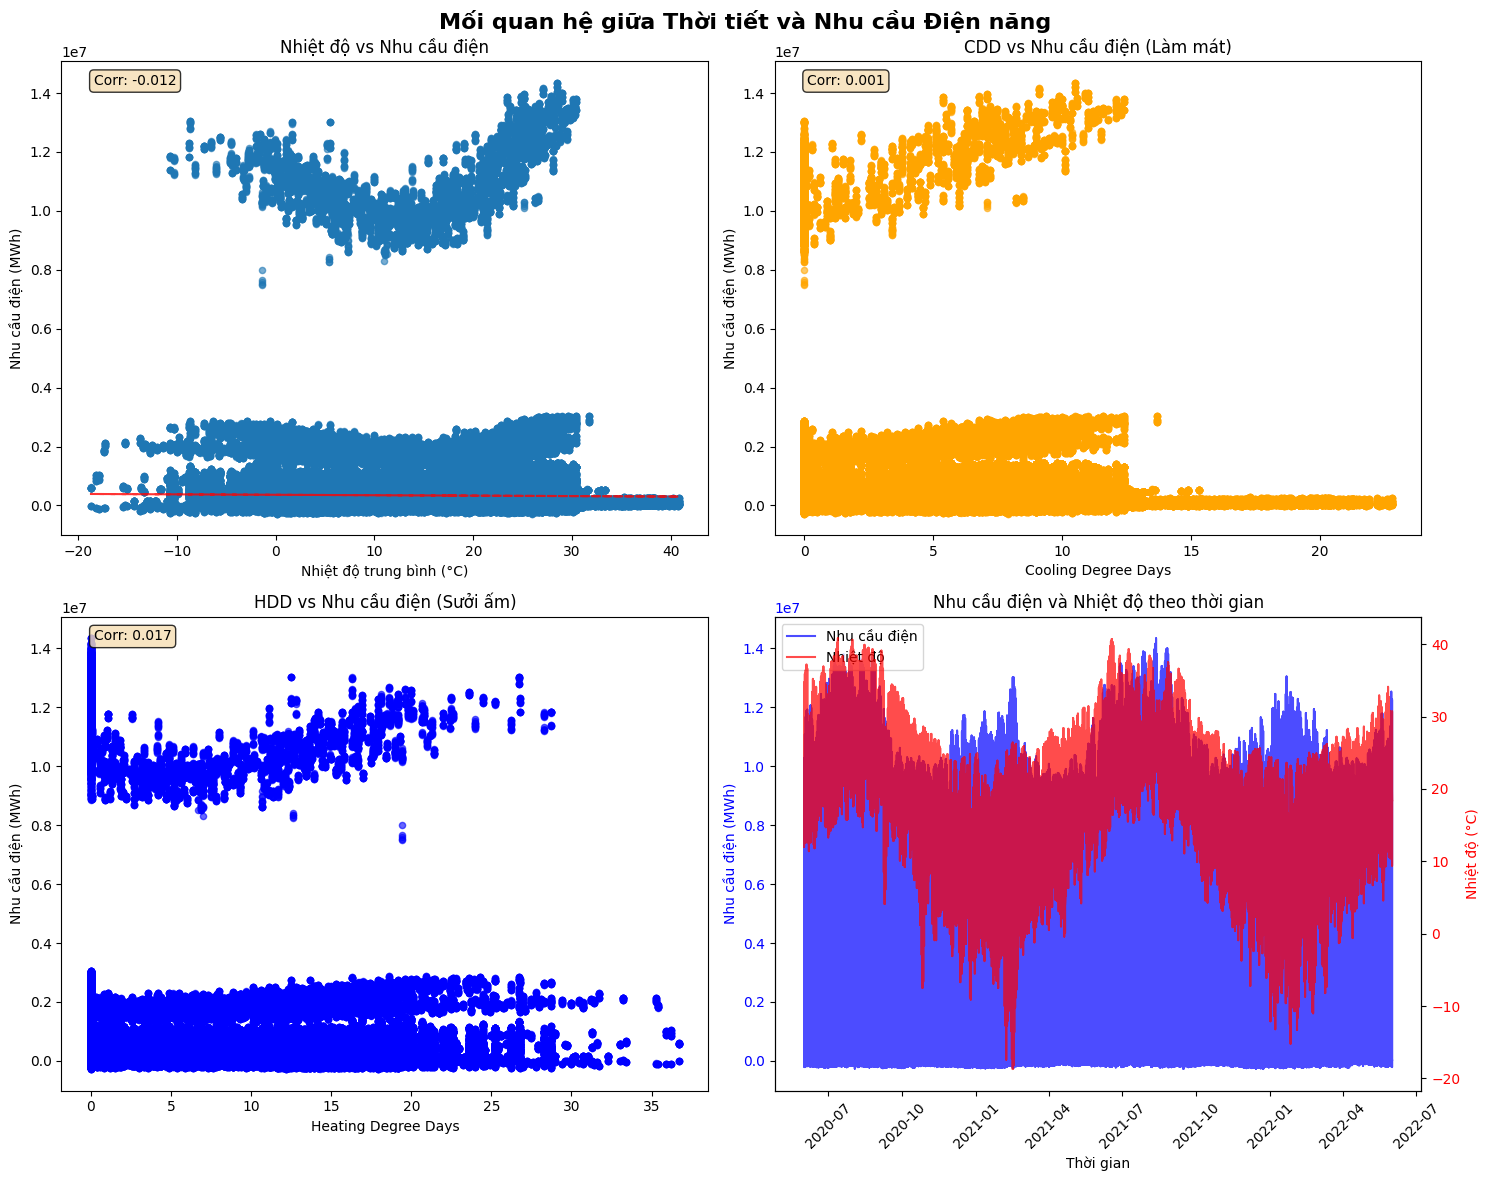

\nüîó MA TR·∫¨N T∆Ø∆†NG QUAN:
       value   tavg   tmax   tmin    cdd    hdd   prcp   wspd
value  1.000 -0.012 -0.015 -0.007  0.001  0.017  0.005  0.025
tavg  -0.012  1.000  0.980  0.978  0.815 -0.943  0.071 -0.195
tmax  -0.015  0.980  1.000  0.929  0.793 -0.928  0.032 -0.221
tmin  -0.007  0.978  0.929  1.000  0.804 -0.919  0.101 -0.187
cdd    0.001  0.815  0.793  0.804  1.000 -0.576  0.057 -0.137
hdd    0.017 -0.943 -0.928 -0.919 -0.576  1.000 -0.068  0.196
prcp   0.005  0.071  0.032  0.101  0.057 -0.068  1.000  0.139
wspd   0.025 -0.195 -0.221 -0.187 -0.137  0.196  0.139  1.000


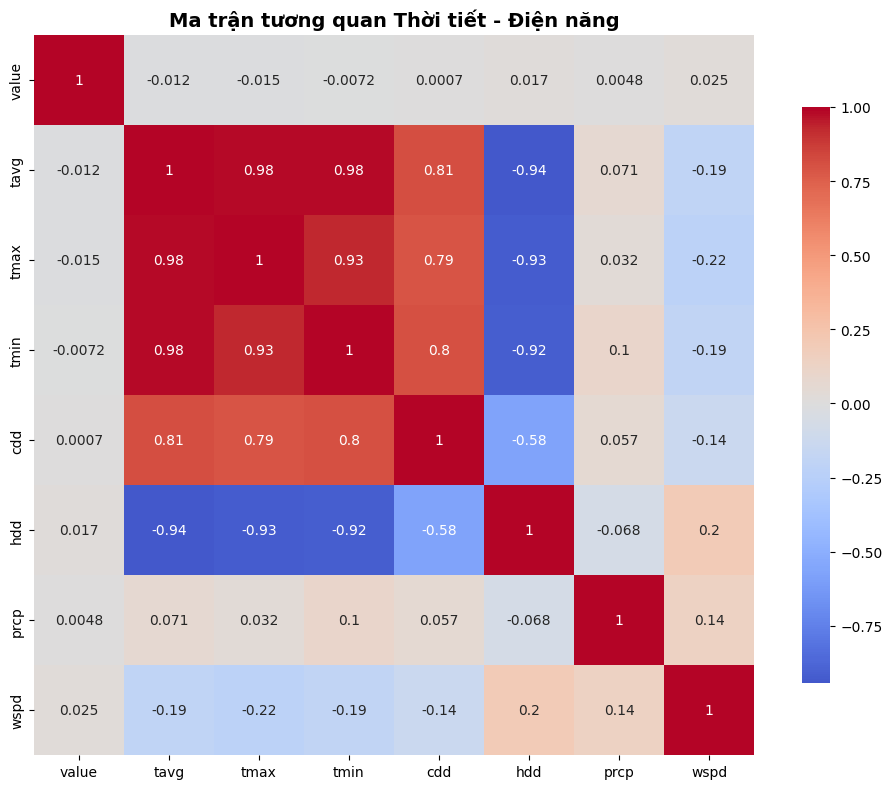

\nüóìÔ∏è PH√ÇN T√çCH THEO M√ôA:
            value                                 tavg   cdd    hdd
             mean         std     min       max   mean  mean   mean
season                                                             
Fall    318994.67  1105145.02 -274790  12709415  17.07  2.15   3.08
Spring  309670.48  1073916.16 -240084  12533201  13.66   1.1   5.43
Summer  383542.79  1335129.26 -264468  14344747  25.26   7.3   0.04
Winter  342941.70  1193613.67 -277749  13048728   4.53  0.16  13.62


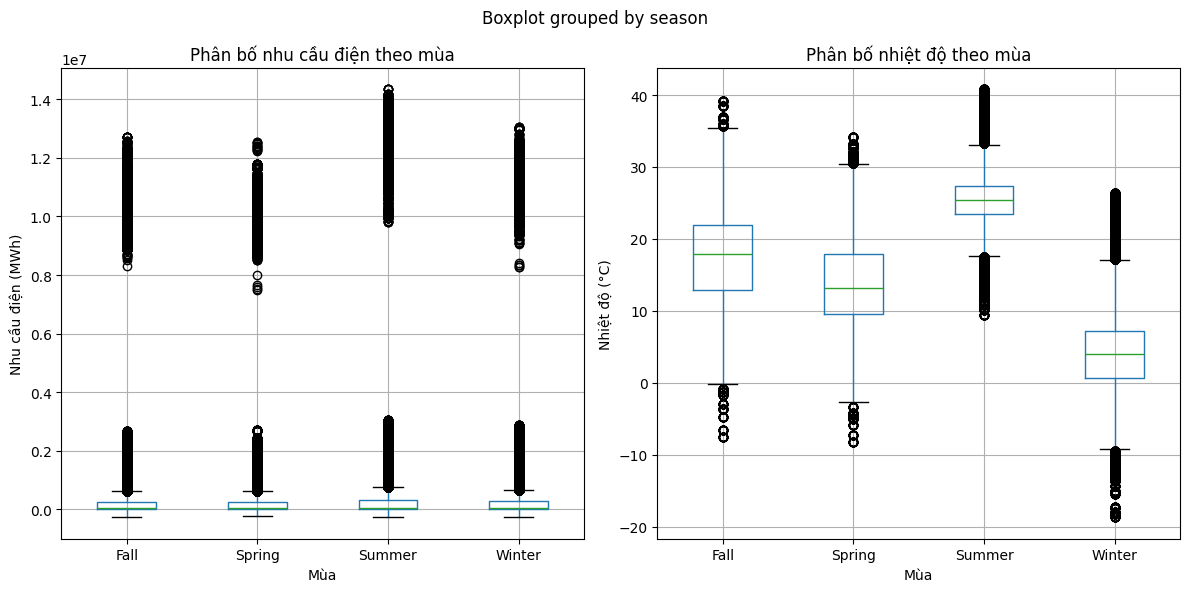

\n‚úÖ Ho√†n th√†nh ph√¢n t√≠ch m·ªëi quan h·ªá th·ªùi ti·∫øt - ƒëi·ªán nƒÉng!


In [ ]:
# Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a m·ªëi quan h·ªá th·ªùi ti·∫øt - ƒëi·ªán nƒÉng

def analyze_weather_energy_relationship(df: pd.DataFrame):
    """
    Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa th·ªùi ti·∫øt v√† nhu c·∫ßu ƒëi·ªán nƒÉng
    """
    if df.empty or 'value' not in df.columns:
        print("‚ùå Kh√¥ng c√≥ d·ªØ li·ªáu ƒë·ªÉ ph√¢n t√≠ch")
        return

    print("üìä PH√ÇN T√çCH M·ªêI QUAN H·ªÜ TH·ªúI TI·∫æT - ƒêI·ªÜN NƒÇNG")
    print("=" * 60)

    # T·∫°o figure v·ªõi subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('M·ªëi quan h·ªá gi·ªØa Th·ªùi ti·∫øt v√† Nhu c·∫ßu ƒêi·ªán nƒÉng', fontsize=16, fontweight='bold')

    # 1. Scatter plot: Nhi·ªát ƒë·ªô vs Nhu c·∫ßu ƒëi·ªán
    if 'tavg' in df.columns:
        axes[0, 0].scatter(df['tavg'], df['value'], alpha=0.6, s=20)
        axes[0, 0].set_xlabel('Nhi·ªát ƒë·ªô trung b√¨nh (¬∞C)')
        axes[0, 0].set_ylabel('Nhu c·∫ßu ƒëi·ªán (MWh)')
        axes[0, 0].set_title('Nhi·ªát ƒë·ªô vs Nhu c·∫ßu ƒëi·ªán')

        # Th√™m trend line
        z = np.polyfit(df['tavg'].dropna(), df.loc[df['tavg'].notna(), 'value'], 1)
        p = np.poly1d(z)
        axes[0, 0].plot(df['tavg'].dropna(), p(df['tavg'].dropna()), "r--", alpha=0.8)

        # T√≠nh correlation
        corr = df[['tavg', 'value']].corr().iloc[0, 1]
        axes[0, 0].text(0.05, 0.95, f'Corr: {corr:.3f}', transform=axes[0, 0].transAxes,
                       bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

    # 2. CDD vs Nhu c·∫ßu ƒëi·ªán (cooling demand)
    if 'cdd' in df.columns:
        axes[0, 1].scatter(df['cdd'], df['value'], alpha=0.6, s=20, color='orange')
        axes[0, 1].set_xlabel('Cooling Degree Days')
        axes[0, 1].set_ylabel('Nhu c·∫ßu ƒëi·ªán (MWh)')
        axes[0, 1].set_title('CDD vs Nhu c·∫ßu ƒëi·ªán (L√†m m√°t)')

        # Correlation
        corr_cdd = df[['cdd', 'value']].corr().iloc[0, 1]
        axes[0, 1].text(0.05, 0.95, f'Corr: {corr_cdd:.3f}', transform=axes[0, 1].transAxes,
                       bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

    # 3. HDD vs Nhu c·∫ßu ƒëi·ªán (heating demand)
    if 'hdd' in df.columns:
        axes[1, 0].scatter(df['hdd'], df['value'], alpha=0.6, s=20, color='blue')
        axes[1, 0].set_xlabel('Heating Degree Days')
        axes[1, 0].set_ylabel('Nhu c·∫ßu ƒëi·ªán (MWh)')
        axes[1, 0].set_title('HDD vs Nhu c·∫ßu ƒëi·ªán (S∆∞·ªüi ·∫•m)')

        # Correlation
        corr_hdd = df[['hdd', 'value']].corr().iloc[0, 1]
        axes[1, 0].text(0.05, 0.95, f'Corr: {corr_hdd:.3f}', transform=axes[1, 0].transAxes,
                       bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

    # 4. Time series: Nhu c·∫ßu ƒëi·ªán v√† nhi·ªát ƒë·ªô theo th·ªùi gian
    if 'period' in df.columns and 'tavg' in df.columns:
        # Sort by date
        df_sorted = df.sort_values('period')

        # Dual y-axis
        ax4 = axes[1, 1]
        ax4_twin = ax4.twinx()

        # Plot demand
        line1 = ax4.plot(df_sorted['period'], df_sorted['value'], 'b-', alpha=0.7, label='Nhu c·∫ßu ƒëi·ªán')
        ax4.set_xlabel('Th·ªùi gian')
        ax4.set_ylabel('Nhu c·∫ßu ƒëi·ªán (MWh)', color='b')
        ax4.tick_params(axis='y', labelcolor='b')

        # Plot temperature
        line2 = ax4_twin.plot(df_sorted['period'], df_sorted['tavg'], 'r-', alpha=0.7, label='Nhi·ªát ƒë·ªô')
        ax4_twin.set_ylabel('Nhi·ªát ƒë·ªô (¬∞C)', color='r')
        ax4_twin.tick_params(axis='y', labelcolor='r')

        # Rotate x-axis labels
        ax4.tick_params(axis='x', rotation=45)

        ax4.set_title('Nhu c·∫ßu ƒëi·ªán v√† Nhi·ªát ƒë·ªô theo th·ªùi gian')

        # Legend
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax4.legend(lines, labels, loc='upper left')

    plt.tight_layout()
    plt.show()

    # In th·ªëng k√™ correlation
    print("\\nüîó MA TR·∫¨N T∆Ø∆†NG QUAN:")
    weather_energy_cols = ['value']
    if 'tavg' in df.columns:
        weather_energy_cols.append('tavg')
    if 'tmax' in df.columns:
        weather_energy_cols.append('tmax')
    if 'tmin' in df.columns:
        weather_energy_cols.append('tmin')
    if 'cdd' in df.columns:
        weather_energy_cols.append('cdd')
    if 'hdd' in df.columns:
        weather_energy_cols.append('hdd')
    if 'prcp' in df.columns:
        weather_energy_cols.append('prcp')
    if 'wspd' in df.columns:
        weather_energy_cols.append('wspd')

    if len(weather_energy_cols) > 1:
        correlation_matrix = df[weather_energy_cols].corr()
        print(correlation_matrix.round(3))

        # Heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, cbar_kws={"shrink": .8})
        plt.title('Ma tr·∫≠n t∆∞∆°ng quan Th·ªùi ti·∫øt - ƒêi·ªán nƒÉng', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # Ph√¢n t√≠ch theo m√πa
    if 'season' in df.columns:
        print("\\nüóìÔ∏è PH√ÇN T√çCH THEO M√ôA:")
        seasonal_stats = df.groupby('season').agg({
            'value': ['mean', 'std', 'min', 'max'],
            'tavg': 'mean' if 'tavg' in df.columns else lambda x: None,
            'cdd': 'mean' if 'cdd' in df.columns else lambda x: None,
            'hdd': 'mean' if 'hdd' in df.columns else lambda x: None
        }).round(2)
        print(seasonal_stats)

        # Box plot theo m√πa
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        df.boxplot(column='value', by='season', ax=plt.gca())
        plt.title('Ph√¢n b·ªë nhu c·∫ßu ƒëi·ªán theo m√πa')
        plt.xlabel('M√πa')
        plt.ylabel('Nhu c·∫ßu ƒëi·ªán (MWh)')

        if 'tavg' in df.columns:
            plt.subplot(1, 2, 2)
            df.boxplot(column='tavg', by='season', ax=plt.gca())
            plt.title('Ph√¢n b·ªë nhi·ªát ƒë·ªô theo m√πa')
            plt.xlabel('M√πa')
            plt.ylabel('Nhi·ªát ƒë·ªô (¬∞C)')

        plt.tight_layout()
        plt.show()

    print("\\n‚úÖ Ho√†n th√†nh ph√¢n t√≠ch m·ªëi quan h·ªá th·ªùi ti·∫øt - ƒëi·ªán nƒÉng!")

# S·ª≠ d·ª•ng h√†m ph√¢n t√≠ch (n·∫øu c√≥ d·ªØ li·ªáu)
if 'integrated_data' in locals() and not integrated_data.empty:
    analyze_weather_energy_relationship(integrated_data)
else:
    print("‚ö†Ô∏è Ch∆∞a c√≥ d·ªØ li·ªáu t√≠ch h·ª£p ƒë·ªÉ ph√¢n t√≠ch.")
    print("üí° H√£y ch·∫°y cell thu th·∫≠p d·ªØ li·ªáu ·ªü tr√™n tr∆∞·ªõc.")

### Display

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df_region = pd.read_csv("/content/drive/MyDrive/DS200/energy_weather_data_2020-06-01_to_2022-06-01_US_Center.csv")
df_region.head(10)

period respondent                respondent-name type type-name  \
0  2020-06-01        AEC  PowerSouth Energy Cooperative    D    Demand   
1  2020-06-01        AEC  PowerSouth Energy Cooperative    D    Demand   
2  2020-06-01        AEC  PowerSouth Energy Cooperative    D    Demand   
3  2020-06-01        AEC  PowerSouth Energy Cooperative    D    Demand   
4  2020-06-01        AEC  PowerSouth Energy Cooperative    D    Demand   
5  2020-06-02        AEC  PowerSouth Energy Cooperative    D    Demand   
6  2020-06-02        AEC  PowerSouth Energy Cooperative    D    Demand   
7  2020-06-02        AEC  PowerSouth Energy Cooperative    D    Demand   
8  2020-06-02        AEC  PowerSouth Energy Cooperative    D    Demand   
9  2020-06-02        AEC  PowerSouth Energy Cooperative    D    Demand   

   timezone timezone-description  value    value-units  year  month  day  \
0   Arizona              Arizona  14161  megawatthours  2020      6    1   
1   Central              Central  14023  megawatthours  2020      6    1   
2   Eastern              Eastern  13960  megawatthours  2020      6    1   
3  Mountain             Mountain  14103  megawatthours  2020      6    1   
4   Pacific              Pacific  14161  megawatthours  2020      6    1   
5   Arizona              Arizona  13074  megawatthours  2020      6    2   
6   Central              Central  13171  megawatthours  2020      6    2   
7   Eastern              Eastern  13230  megawatthours  2020      6    2   
8  Mountain             Mountain  13115  megawatthours  2020      6    2   
9   Pacific              Pacific  13074  megawatthours  2020      6    2   

   day_of_week  day_of_year  week_of_year  is_weekend  quarter month_day  \
0            0          153            23           0        2     06-01   
1            0          153            23           0        2     06-01   
2            0          153            23           0        2     06-01   
3            0          153            23           0        2     06-01   
4            0          153            23           0        2     06-01   
5            1          154            23           0        2     06-02   
6            1          154            23           0        2     06-02   
7            1          154            23           0        2     06-02   
8            1          154            23           0        2     06-02   
9            1          154            23           0        2     06-02   

   season        date  is_holiday  is_business_day  demand_lag_1d  \
0  Summer  2020-06-01           0                1            NaN   
1  Summer  2020-06-01           0                1        14161.0   
2  Summer  2020-06-01           0                1        14023.0   
3  Summer  2020-06-01           0                1        13960.0   
4  Summer  2020-06-01           0                1        14103.0   
5  Summer  2020-06-02           0                1        14161.0   
6  Summer  2020-06-02           0                1        13074.0   
7  Summer  2020-06-02           0                1        13171.0   
8  Summer  2020-06-02           0                1        13230.0   
9  Summer  2020-06-02           0                1        13115.0   

   demand_lag_7d  demand_lag_30d  demand_lag_365d  demand_ma_7d  \
0            NaN             NaN              NaN  14161.000000   
1            NaN             NaN              NaN  14092.000000   
2            NaN             NaN              NaN  14048.000000   
3            NaN             NaN              NaN  14061.750000   
4            NaN             NaN              NaN  14081.600000   
5            NaN             NaN              NaN  13913.666667   
6            NaN             NaN              NaN  13807.571429   
7        14161.0             NaN              NaN  13674.571429   
8        14023.0             NaN              NaN  13544.857143   
9        13960.0             NaN              NaN  13418.285714   

   demand_ma_30d  de

In [ ]:
df_region.isnull().sum().head(10)

period                  0
respondent              0
respondent-name         0
type                    0
type-name               0
timezone                0
timezone-description    0
value                   0
value-units             0
year                    0
dtype: int64

In [ ]:
df_region['year'].unique()

array([2020, 2021, 2022])

In [ ]:
df_region.shape

(1058006, 84)

In [ ]:
df_region['type-name'].unique()

array(['Demand', 'Day-ahead demand forecast', 'Net generation',
       'Total interchange'], dtype=object)

In [ ]:
df_region['timezone'].unique()

array(['Arizona', 'Central', 'Eastern', 'Mountain', 'Pacific'],
      dtype=object)

In [ ]:
df_region['type-name'].value_counts()

type-name
Net generation               283330
Total interchange            281542
Demand                       246938
Day-ahead demand forecast    246196
Name: count, dtype: int64

- Net Generation (S·∫£n l∆∞·ª£ng ƒëi·ªán r√≤ng): L√† t·ªïng l∆∞·ª£ng ƒëi·ªán ƒë∆∞·ª£c ph√°t ra t·ª´ c√°c nh√† m√°y ƒëi·ªán, tr·ª´ ƒëi l∆∞·ª£ng ƒëi·ªán m√† ch√≠nh nh√† m√°y s·ª≠ d·ª•ng cho v·∫≠n h√†nh n·ªôi b·ªô.           Net¬†Generation=Total¬†Generation‚àíElectricity¬†Used¬†by¬†Plant
- Total Interchange (T·ªïng ƒëi·ªán trao ƒë·ªïi): L∆∞·ª£ng ƒëi·ªán trao ƒë·ªïi gi·ªØa c√°c khu v·ª±c l∆∞·ªõi ƒëi·ªán kh√°c nhau, bao g·ªìm c·∫£ nh·∫≠p (import) v√† xu·∫•t (export) ƒëi·ªán.             
Gi√° tr·ªã d∆∞∆°ng ‚Üí nh·∫≠p ƒëi·ªán t·ª´ ngo√†i v√†o v√πng.      
Gi√° tr·ªã √¢m ‚Üí xu·∫•t ƒëi·ªán ra v√πng kh√°c.
- Demand (Nhu c·∫ßu ti√™u th·ª• ƒëi·ªán): L∆∞·ª£ng ƒëi·ªán th·ª±c t·∫ø ƒë∆∞·ª£c ng∆∞·ªùi d√πng ti√™u th·ª• t·∫°i m·ªôt th·ªùi ƒëi·ªÉm trong h·ªá th·ªëng ƒëi·ªán.       
- Day-ahead Demand Forecast (D·ª± b√°o nhu c·∫ßu ƒëi·ªán tr∆∞·ªõc 1 ng√†y): L√† l∆∞·ª£ng ƒëi·ªán ƒë∆∞·ª£c d·ª± b√°o tr∆∞·ªõc m·ªôt ng√†y, nh·∫±m m·ª•c ƒë√≠ch l√™n k·∫ø ho·∫°ch v·∫≠n h√†nh l∆∞·ªõi ƒëi·ªán v√† ph√¢n b·ªï ngu·ªìn ph√°t h·ª£p l√Ω.     


*** M·ªëi quan h·ªá gi·ªØa c√°c th√†nh ph·∫ßn:        
- Net¬†Generation+Total¬†Interchange‚âàDemand           
- Nghƒ©a l√† t·ªïng ƒëi·ªán ph√°t ra c·ªông v·ªõi ƒëi·ªán trao ƒë·ªïi r√≤ng s·∫Ω x·∫•p x·ªâ b·∫±ng t·ªïng nhu c·∫ßu ti√™u th·ª• trong khu v·ª±c.
